In [1]:
import pandas as pd
from netCDF4 import *
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import calendar
import matplotlib.lines as lines
import cartopy.crs as ccrs
import cartopy.feature as cfeature
#from mpl_toolkits.basemap import maskoceans
#from mpl_toolkits.basemap import Basemap, cm, shiftgrid, addcyclic
#from wrf import to_np, getvar, smooth2d, get_basemap, latlon_coords, destagger
import sys, os

In [ ]:
dir_fi = "/home/sak298/WRF_water_budget/Make_plots_Final/PGW/Wet_season/"
dir_const = "/home/sak298/WRF_water_budget/"
nc = Dataset(dir_fi+'QV_Daily_momnean_2012_07.nc',mode='r')
nc_cont = Dataset(dir_const+'./wrfout_d01_2003-10-30_00:00:00',mode='r')

lon=nc_cont['XLONG'][0,:,:]
lat=nc_cont['XLAT'][0,:,:]
slp = getvar(nc_cont,"HGT")
lats, lons = latlon_coords(slp)
bm = get_basemap(slp)
x, y = bm(to_np(lons), to_np(lats))

ADV = nc['QV_AdvInt_day'][0,:,:]
GRD = nc['QV_divInt_day'][0,:,:]
mflux = ADV + GRD
DIR="/home/sak298/WRF_CTRL_MFC/"

plt.figure(figsize=(12,9))

levels = np.arange(-0.009, 0.009, 0.0001)
#levels = np.arange(mflux.min(),mflux.max(),( mflux.max() - mflux.min() )/20 )
mdata = maskoceans(lons, lats, smooth2d(mflux,10))

bm.drawcoastlines(color = '0.11')
bm.contourf(x, y, mdata, levels=levels, cmap=get_cmap("RdBu"))
plt.title(r'Integrated MFLUX PGW', fontsize=16.5)
plt.colorbar()

parallels = np.arange(0.,81,10.)
# labels = [left,right,top,bottom]
bm.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
bm.drawmeridians(meridians,labels=[True,False,False,True])


bm.readshapefile(DIR+"SRB_shapefile/srb2",'srb2')

for info, shape in zip(bm.srb2, bm.srb2):
    x1, y1 = zip(*shape)
    bm.plot(x1, y1, marker=None,color='b',linewidth=2)

bm.readshapefile(DIR+"Canada_map/mrb",\
                     'mrb',drawbounds = False)
for info, shape in zip(bm.mrb, bm.mrb):
    x1, y1 = zip(*shape)
    bm.plot(x1, y1, marker=None,color='b',linewidth=2)


In [ ]:
!ls -lshrt /home/sak298/WRF_water_budget/wrfout_d01_2003-10-30_00:00:00

In [ ]:
def plot_figures(PP,para,year):
    dir_const = "/home/sak298/WRF_water_budget/"
    nc_cont = Dataset(dir_const+'wrfout_d01_2003-10-30_00:00:00',mode='r')
    nc = Dataset(PP,mode='r')
    DIR_SHAPE="/home/sak298/WRF_CTRL_MFC/"
    
    lon=nc_cont['XLONG'][0,:,:]
    lat=nc_cont['XLAT'][0,:,:]
    slp = getvar(nc_cont,"HGT")
    lats, lons = latlon_coords(slp)
    bm = get_basemap(slp)
    x, y = bm(to_np(lons), to_np(lats))

    ADV = nc[para+'_AdvInt_day'][0,:,:]
    GRD = nc[para+'_divInt_day'][0,:,:]
    mflux = ADV + GRD
    plt.figure(figsize=(12,9))

#levels = np.arange(-0.00009, 0.00009, 0.000005)
#    levels = np.arange(-0.0001, 0.0001, 0.00001)

    if para=='QV':
        levels = np.arange(-0.01, 0.01, abs(-0.01-0.01)/20)
    if para=="QC":
        levels = np.arange(-0.0003, 0.0003, abs(-0.0003-0.0003)/20)
    if para=='QS':
        levels = np.arange(-0.0009, 0.0009, abs(-0.0009-0.0009)/20)
    if para=='QR':
        levels = np.arange(-0.0005, 0.0005, abs(-0.0005-0.0005)/20)
    if para=='QI':
        levels = np.arange(-0.00001, 0.00001, abs(-0.00001- 0.00001)/20)
    if para=='QG':
        levels = np.arange(-0.0006, 0.0006, abs(-0.0006 - 0.0006)/20)

    #    levels_QC = np.arange(-0.0003, 0.0003, 0.00001)
    mdata = maskoceans(lons, lats, smooth2d(mflux,10))

    bm.drawcoastlines(color = '0.11')
    bm.contourf(x, y, mdata, levels=levels, cmap=get_cmap("RdBu"))
    plt.title(r'{} {} PGW'.format(para,year), fontsize=16.5)
    plt.colorbar()

    parallels = np.arange(0.,81,10.)
    bm.drawparallels(parallels,labels=[False,True,True,False])
    meridians = np.arange(10.,351.,20.)
    bm.drawmeridians(meridians,labels=[True,False,False,True])
#    plt.savefig("SEASON_MFLUX_"+str(year)+"_"+para+".eps",format='eps')
    bm.readshapefile(DIR_SHAPE+"SRB_shapefile/srb2",'srb2')

    for info, shape in zip(bm.srb2, bm.srb2):
        x1, y1 = zip(*shape)
        bm.plot(x1, y1, marker=None,color='b',linewidth=2)

    bm.readshapefile(DIR_SHAPE+"Canada_map/mrb",\
                         'mrb',drawbounds = False)
    for info, shape in zip(bm.mrb, bm.mrb):
        x1, y1 = zip(*shape)
        bm.plot(x1, y1, marker=None,color='b',linewidth=2)
    plt.savefig("SEASON_MFLUX_"+str(year)+"_"+para+".png",format='png')



#season = 'Dry'
#expt = ['PGW', 'CTRL']
years = [2010,2011,2012]
Para = ['QC','QV','QR','QI','QS','QG']
Dir="./"

for yr in range(len(years)):
    for pr in range(len(Para)):
        PP=Dir+Para[pr]+"_Daily_momnean_"+str(years[yr])+"_07.nc"
        par=Para[pr]
        yrs=years[yr]
        plot_figures(PP,par,yrs)

In [ ]:
#
# Plot Figures for individual variables
def plot_figures(PP,para,year,expt,season):
    dir_const = "/home/sak298/WRF_water_budget/"
    nc_cont = Dataset(dir_const+'wrfout_d01_2003-10-30_00:00:00',mode='r')
    nc = Dataset(PP,mode='r')
    DIR_SHAPE="/home/sak298/WRF_CTRL_MFC/"
    
    lon=nc_cont['XLONG'][0,:,:]
    lat=nc_cont['XLAT'][0,:,:]
    slp = getvar(nc_cont,"HGT")
    lats, lons = latlon_coords(slp)
    bm = get_basemap(slp)
    x, y = bm(to_np(lons), to_np(lats))

    ADV = nc[para+'_AdvInt_day'][0,:,:]
    GRD = nc[para+'_divInt_day'][0,:,:]
    mflux = ADV + GRD
    plt.figure(figsize=(12,9))

#     levels_QV = np.arange(-0.009, 0.009, 0.0001)
#     levels_QC = np.arange(-0.0003, 0.0003, 0.00001)
#     levels_QS = np.arange(-0.0009, 0.0009, 0.00001)
#     levels_QR = np.arange(-0.0005, 0.0005, 0.00001)
#     levels_QI = np.arange(-0.00001, 0.00001, abs(-0.00001 - 0.00001)/20)
#     levels_QG = np.arange(-0.0006, 0.0006, abs(-0.0006 - 0.0006)/20)

    if para=='QV':
        levels = np.arange(-0.01, 0.01, abs(-0.01-0.01)/20)
    if para=="QC":
        levels = np.arange(-0.0003, 0.0003, abs(-0.0003-0.0003)/20)
    if para=='QS':
        levels = np.arange(-0.0009, 0.0009, abs(-0.0009-0.0009)/20)
    if para=='QR':
        levels = np.arange(-0.0005, 0.0005, abs(-0.0005-0.0005)/20)
    if para=='QI':
        levels = np.arange(-0.00001, 0.00001, abs(-0.00001- 0.00001)/20)
    if para=='QG':
        levels = np.arange(-0.0006, 0.0006, abs(-0.0006 - 0.0006)/20)

    #    levels_QC = np.arange(-0.0003, 0.0003, 0.00001)
    mdata = maskoceans(lons, lats, smooth2d(mflux,10))

    bm.drawcoastlines(color = '0.11')
    bm.contourf(x, y, mdata, levels=levels, cmap=get_cmap("RdBu"))
    plt.title(r'{} {} PGW'.format(para,year), fontsize=16.5)
    plt.colorbar()

    parallels = np.arange(0.,81,10.)
    bm.drawparallels(parallels,labels=[False,True,True,False])
    meridians = np.arange(10.,351.,20.)
    bm.drawmeridians(meridians,labels=[True,False,False,True])
#    plt.savefig("SEASON_MFLUX_"+str(year)+"_"+para+".eps",format='eps')
    bm.readshapefile(DIR_SHAPE+"SRB_shapefile/srb2",'srb2')

    for info, shape in zip(bm.srb2, bm.srb2):
        x1, y1 = zip(*shape)
        bm.plot(x1, y1, marker=None,color='b',linewidth=2)

    bm.readshapefile(DIR_SHAPE+"Canada_map/mrb",\
                         'mrb',drawbounds = False)
    for info, shape in zip(bm.mrb, bm.mrb):
        x1, y1 = zip(*shape)
        bm.plot(x1, y1, marker=None,color='b',linewidth=2)
    plt.savefig(str(season)+"_"+str(expt)+"_MFLUX_"+str(year)+"_"+para+".png",format='png')


In [ ]:
import glob
expt = ['PGW', 'CTRL']
seasons = ['Dry','Wet']
home_dir="/home/sak298/WRF_water_budget/Make_plots_Final/"
years_wet = [2010,2011,2012]
years_dry = [2001,2002,2003,2004]
Para = ['QC','QV','QR','QI','QS','QG']

for ex in range(len(expt)):
    for ses in range(len(seasons)):
        Dir=home_dir+str(expt[ex])+"/"+str(seasons[ses])+"_season/"
        print(Dir)
        if str(seasons[ses])=='Dry':
            years = years_dry
        else:
            years = years_wet
        for yr in range(len(years)):
            for pr in range(len(Para)):
                PP=Dir+Para[pr]+"_Daily_momnean_"+str(years[yr])+"_07.nc"
                par=Para[pr]
                yrs=years[yr]
                plot_figures(PP,par,yrs,str(expt[ex]),str(seasons[ses]))

In [ ]:

def plot_figures_diff(PP_ctrl,PP_pgw,para,year,season):
    dir_const = "/home/sak298/WRF_water_budget/"
    nc_cont = Dataset(dir_const+'wrfout_d01_2003-10-30_00:00:00',mode='r')
    nc_ctrl = Dataset(PP_ctrl,mode='r')
    nc_pgw = Dataset(PP_pgw,mode='r')
    DIR_SHAPE="/home/sak298/WRF_CTRL_MFC/"
    
    lon=nc_cont['XLONG'][0,:,:]
    lat=nc_cont['XLAT'][0,:,:]
    slp = getvar(nc_cont,"HGT")
    lats, lons = latlon_coords(slp)
    bm = get_basemap(slp)
    x, y = bm(to_np(lons), to_np(lats))

    ADV_c = nc_ctrl[para+'_AdvInt_day'][0,:,:]
    GRD_c = nc_ctrl[para+'_divInt_day'][0,:,:]
    mflux_ctrl = ADV_c + GRD_c
    
    ADV_p = nc_pgw[para+'_AdvInt_day'][0,:,:]
    GRD_p = nc_pgw[para+'_divInt_day'][0,:,:]
    mflux_pgw = ADV_p + GRD_p
    
    flux_diff = mflux_pgw - mflux_ctrl
    plt.figure(figsize=(12,9))

    if para=='QV':
        levels = np.arange(-0.01, 0.01, abs(-0.01-0.01)/20)
    if para=="QC":
        levels = np.arange(-0.0003, 0.0003, abs(-0.0003-0.0003)/20)
    if para=='QS':
        levels = np.arange(-0.0009, 0.0009, abs(-0.0009-0.0009)/20)
    if para=='QR':
        levels = np.arange(-0.0005, 0.0005, abs(-0.0005-0.0005)/20)
    if para=='QI':
        levels = np.arange(-0.00001, 0.00001, abs(-0.00001- 0.00001)/20)
    if para=='QG':
        levels = np.arange(-0.0006, 0.0006, abs(-0.0006 - 0.0006)/20)

    #    levels_QC = np.arange(-0.0003, 0.0003, 0.00001)
    mdata = maskoceans(lons, lats, smooth2d(flux_diff,10))

    bm.drawcoastlines(color = '0.11')
    bm.contourf(x, y, mdata, levels=levels, cmap=get_cmap("RdBu"))
    plt.title(r'{} {} PGW'.format(para,year), fontsize=16.5)
    plt.colorbar()

    parallels = np.arange(0.,81,10.)
    bm.drawparallels(parallels,labels=[False,True,True,False])
    meridians = np.arange(10.,351.,20.)
    bm.drawmeridians(meridians,labels=[True,False,False,True])
#    plt.savefig("SEASON_MFLUX_"+str(year)+"_"+para+".eps",format='eps')
    bm.readshapefile(DIR_SHAPE+"SRB_shapefile/srb2",'srb2')

    for info, shape in zip(bm.srb2, bm.srb2):
        x1, y1 = zip(*shape)
        bm.plot(x1, y1, marker=None,color='b',linewidth=2)

    bm.readshapefile(DIR_SHAPE+"Canada_map/mrb",\
                         'mrb',drawbounds = False)
    for info, shape in zip(bm.mrb, bm.mrb):
        x1, y1 = zip(*shape)
        bm.plot(x1, y1, marker=None,color='b',linewidth=2)
#    plt.savefig("Diff_"+str(season)+"_"+str(expt)+"_MFLUX_"+str(year)+"_"+para+".png",format='png')


In [ ]:
import glob
seasons = ['Dry','Wet']
home_dir="/home/sak298/WRF_water_budget/Make_plots_Final/"
years_wet = [2010,2011]
years_dry = [2001,2002]
Para = ['QC','QV']

for ses in range(len(seasons)):
    Dir_ctrl=home_dir+"CTRL/"+str(seasons[ses])+"_season/"
    print(Dir_ctrl)
    Dir_pgw=home_dir+"PGW/"+str(seasons[ses])+"_season/"
    print(Dir_pgw)
    if str(seasons[ses])=='Dry':
        years = years_dry
    else:
        years = years_wet
    for yr in range(len(years)):
        for pr in range(len(Para)):
            PP_ctrl=Dir_ctrl+Para[pr]+"_Daily_momnean_"+str(years[yr])+"_07.nc"
            PP_pgw=Dir_pgw+Para[pr]+"_Daily_momnean_"+str(years[yr])+"_07.nc"
            par=Para[pr]
            yrs=years[yr]
            plot_figures_diff(PP_ctrl,PP_pgw,par,yrs,str(seasons[ses]))

In [ ]:
import xarray as xr
seasons = ['Dry','Wet']
home_dir="/home/sak298/WRF_water_budget/Make_plots_Final/"
years_wet = [2010,2011]
years_dry = [2001,2002]
Para = ['QC','QV']

for ses in range(len(seasons)):
    Dir_ctrl=home_dir+"CTRL/"+str(seasons[ses])+"_season/"
    print(Dir_ctrl)
    Dir_pgw=home_dir+"PGW/"+str(seasons[ses])+"_season/"
    print(Dir_pgw)
    if str(seasons[ses])=='Dry':
        years = years_dry
    else:
        years = years_wet
    for yr in range(len(years)):
        for pr in range(len(Para)):
            PP_ctrl=Dir_ctrl+Para[pr]+"_Daily_momnean_"+str(years[yr])+"_07.nc"
            PP_pgw=Dir_pgw+Para[pr]+"_Daily_momnean_"+str(years[yr])+"_07.nc"
            par=Para[pr]
            yrs=years[yr]
            plot_figures_diff(PP_ctrl,PP_pgw,par,yrs,str(seasons[ses]))

In [ ]:


ds = xr.open_mfdataset('/home/sak298/WRF_water_budget/Make_plots_Final/PGW/Wet_season/SRB_PGW_Wet_QC_Avg_2010_01.nc')
df = ds.to_dataframe()
var=df['CTRL_Mflux_wrf_avg'][1]

In [ ]:
region = ['SRB','MRB']
seasons = ['Dry','Wet']
home_dir="/home/sak298/WRF_water_budget/Make_plots_Final/"
years_wet = [2010,2011]
years_dry = [2001,2002]
Para = ['QC','QV']
expt = ['PGW','CTRL']

for ses in range(len(seasons)):
    Dir_ctrl=home_dir+"CTRL/"+str(seasons[ses])+"_season/"
#        print(Dir_ctrl)
    Dir_pgw=home_dir+"PGW/"+str(seasons[ses])+"_season/"
#        print(Dir_pgw)
    if str(seasons[ses])=='Dry':
        years = years_dry
    else:
        years = years_wet
    for rg in region:
        for yr in range(len(years)):
            for pr in range(len(Para)):
                PP_ctrl=Dir_ctrl+rg+"_PGW_"+str(seasons[ses])+"_"+Para[pr]+"_Avg_"+str(years[yr])+"_07.nc"
                print(PP_ctrl)
                ds = xr.open_mfdataset(PP_ctrl)
                df = ds.to_dataframe()
                var=df['CTRL_Mflux_wrf_avg'][1]
                print(var)
    #                PP_ctrl=Dir_ctrl+Para[pr]+"_Daily_momnean_"+str(years[yr])+"_07.nc"
                PP_pgw=Dir_pgw+Para[pr]+"_Daily_momnean_"+str(years[yr])+"_07.nc"
                par=Para[pr]
                yrs=years[yr]
        


In [ ]:
region = ['SRB','MRB']
seasons = ['Dry','Wet']
home_dir="/home/sak298/WRF_water_budget/Make_plots_Final/"
years_wet = [2010,2011]
years_dry = [2001,2002,2003]
Para = ['QC','QV']
expt = ['PGW','CTRL']

dfObj = pd.DataFrame(columns=['Region','Year','Exp','Variable','Mflux_avg', 'Mflux_sum'])
print("Empty Dataframe ", dfObj, sep='\n')
dfObj = dfObj.append({'Year': '01-2010','Exp': 'PGW','Variable': 'QC', 'Mflux_avg': '-4.632014e-06', 'Mflux_sum': '0.1986'}, ignore_index=True)
dfObj
#/home/sak298/WRF_water_budget/Make_plots_Final/CTRL/Dry_season

for exp1 in expt:
    if exp1=='PGW':
        dir1=home_dir+"PGW/"
    else:
        dir1=home_dir+"CTRL/"
    for ses in range(len(seasons)):
        Dir_ctrl=dir1+str(seasons[ses])+"_season/"
        Dir_pgw=dir1+str(seasons[ses])+"_season/"
        if str(seasons[ses])=='Dry':
            years = years_dry            
        else:
            years = years_wet
            
        for rg in region:
            for yr in range(len(years)):
                for pr in range(len(Para)):
                    PP_ctrl=Dir_ctrl+rg+"_"+exp1+"_"+str(seasons[ses])+"_"+Para[pr]+"_Avg_"+str(years[yr])+"_07.nc"
                    print(PP_ctrl)
                    ds = xr.open_mfdataset(PP_ctrl)
                    df = ds.to_dataframe()
                    var1=df['CTRL_Mflux_wrf_avg'][1]
                    var2=df['CTRL_Mflux_wrf_sum'][1]
                    dfObj = dfObj.append({'Year': '01-'+str(years[yr]),'Exp': exp1,'Variable': Para[pr],\
                                          'Mflux_avg': var1, 'Mflux_sum': var2},ignore_index=True)


In [165]:
# df = pd.read_pickle('monthly_avg')
# dfy1 = df.set_index('Year')
# df_mpd=dfy1.loc[(dfy1['Region'] == 'MRB') & (dfy1['Exp'] == 'PGW') & (dfy1['Season'] == 'Dry')]
# df_mcd=dfy1.loc[(dfy1['Region'] == 'MRB') & (dfy1['Exp'] == 'CTRL') & (dfy1['Season'] == 'Dry')]
# df_mpd = df_mpd[['Variable','Region','Mflux_avg']].groupby(['Variable','Region'])
# df_mcd = df_mcd[['Variable','Region','Mflux_avg']].groupby(['Variable','Region'])
#df_mcd.plot.bar()


In [166]:
# df = pd.read_pickle('monthly_avg')
# dfy1 = df.set_index('Year')
# df_mpd=dfy1.loc[(dfy1['Region'] == 'MRB') & (dfy1['Season'] == 'Dry')]
# df_mpd = df_mpd[['Variable','Exp','Mflux_avg']].groupby(['Exp','Variable']).plot.bar()

In [167]:
# df_mpd = df_mpd[['Variable','Region','Mflux_avg']].groupby(['Variable'])


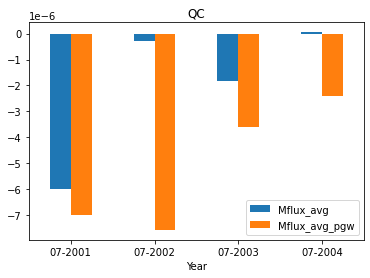

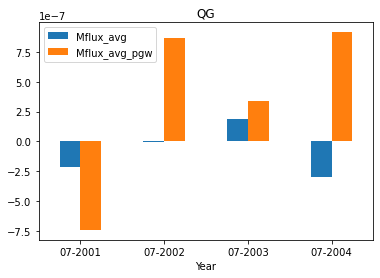

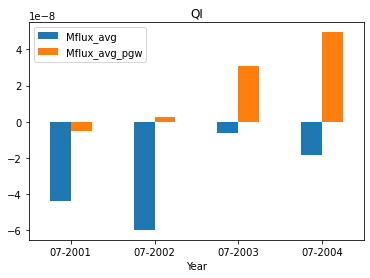

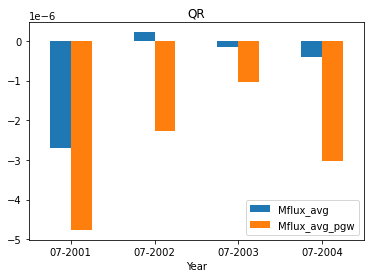

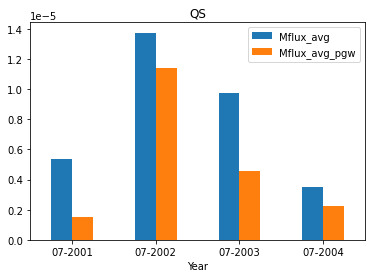

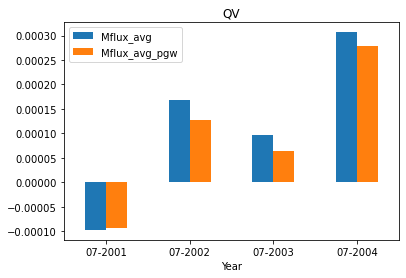

In [168]:
### DRY ## PERIOD

df = pd.read_pickle('monthly_avg')
dfy1 = df.set_index('Year')
df_mcd=dfy1.loc[(dfy1['Region'] == 'MRB') & (dfy1['Season'] == 'Dry') & (dfy1['Exp'] == 'CTRL') ]
df_mpd=dfy1.loc[(dfy1['Region'] == 'MRB') & (dfy1['Season'] == 'Dry') & (dfy1['Exp'] == 'PGW') ]
dfc=df_mcd[['Variable','Mflux_avg']]
dfp=df_mpd[['Mflux_avg']].rename(columns={'Mflux_avg':'Mflux_avg_pgw'})
df_new = pd.concat([dfc,dfp],axis=1,sort=False)
#df_new.groupby('Variable').plot.bar()
for grp_name, sub_df in df_new.groupby('Variable'):
    dd=df_new.loc[df_new.Variable == grp_name]
    dd.plot.bar(rot=0,title=grp_name)



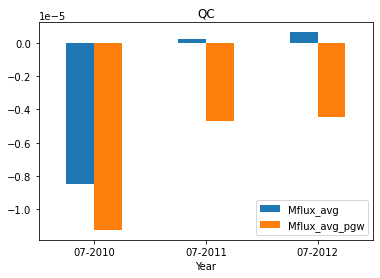

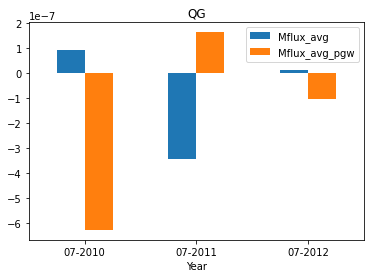

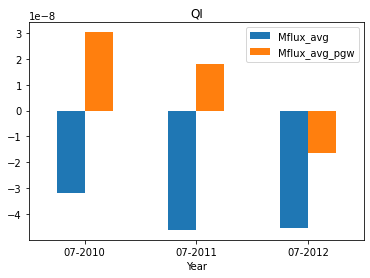

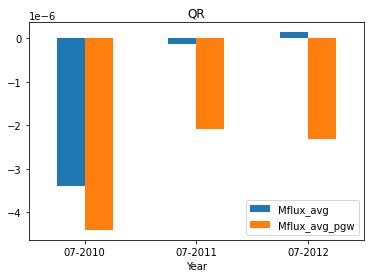

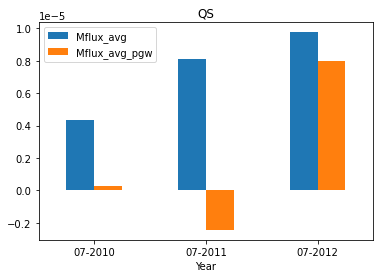

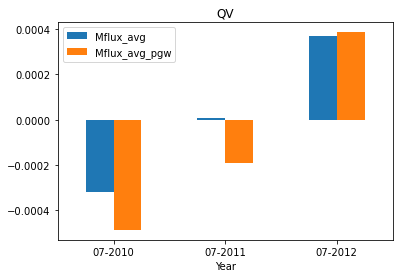

In [169]:
### WET ## PERIOD

df = pd.read_pickle('monthly_avg')
dfy1 = df.set_index('Year')
df_mcd=dfy1.loc[(dfy1['Region'] == 'MRB') & (dfy1['Season'] == 'Wet') & (dfy1['Exp'] == 'CTRL') ]
df_mpd=dfy1.loc[(dfy1['Region'] == 'MRB') & (dfy1['Season'] == 'Wet') & (dfy1['Exp'] == 'PGW') ]
dfc=df_mcd[['Variable','Mflux_avg']]
dfp=df_mpd[['Mflux_avg']].rename(columns={'Mflux_avg':'Mflux_avg_pgw'})
df_new = pd.concat([dfc,dfp],axis=1,sort=False)
#df_new.groupby('Variable').plot.bar()
for grp_name, sub_df in df_new.groupby('Variable'):
    dd=df_new.loc[df_new.Variable == grp_name]
    dd.plot.bar(rot=0,title=grp_name)



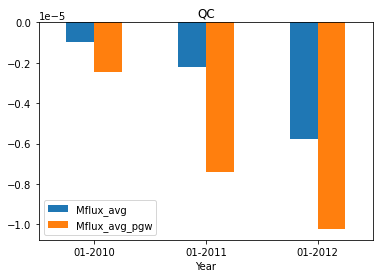

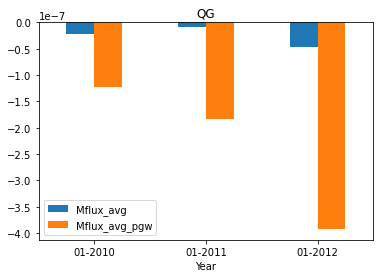

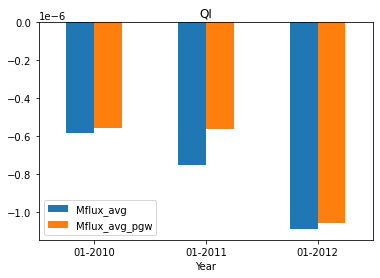

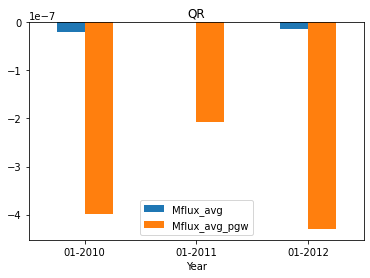

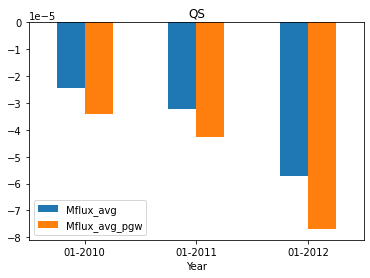

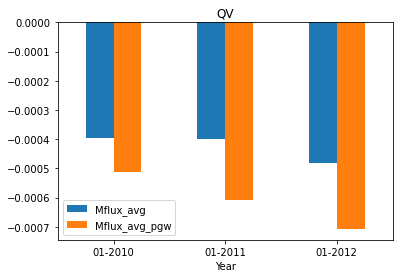

In [170]:
### Winter #### Wet Season ####
df = pd.read_pickle('monthly_avg_01')
dfy1 = df.set_index('Year')
df_mcd=dfy1.loc[(dfy1['Region'] == 'MRB') & (dfy1['Season'] == 'Wet') & (dfy1['Exp'] == 'CTRL') ]
df_mpd=dfy1.loc[(dfy1['Region'] == 'MRB') & (dfy1['Season'] == 'Wet') & (dfy1['Exp'] == 'PGW') ]
dfc=df_mcd[['Variable','Mflux_avg']]
dfp=df_mpd[['Mflux_avg']].rename(columns={'Mflux_avg':'Mflux_avg_pgw'})
df_new = pd.concat([dfc,dfp],axis=1,sort=False)
#df_new.groupby('Variable').plot.bar()
for grp_name, sub_df in df_new.groupby('Variable'):
    dd=df_new.loc[df_new.Variable == grp_name]
    dd.plot.bar(rot=0,title=grp_name)


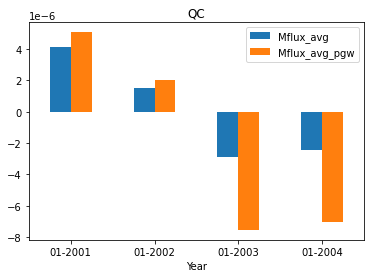

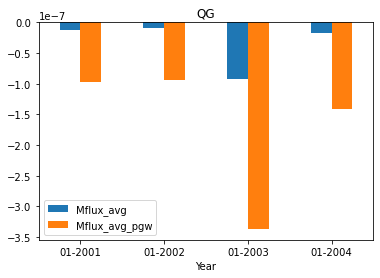

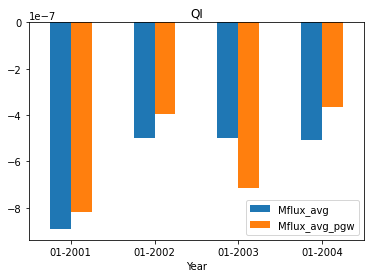

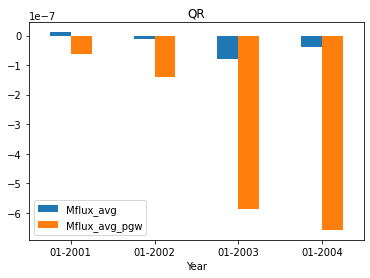

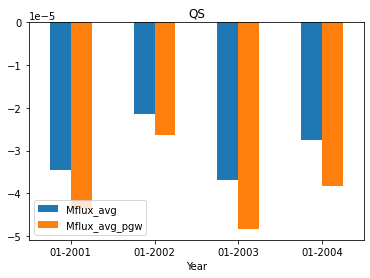

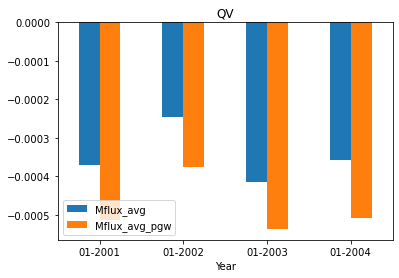

In [171]:
### Winter #### Dry Season ####
df = pd.read_pickle('monthly_avg_01')
dfy1 = df.set_index('Year')
df_mcd=dfy1.loc[(dfy1['Region'] == 'MRB') & (dfy1['Season'] == 'Dry') & (dfy1['Exp'] == 'CTRL') ]
df_mpd=dfy1.loc[(dfy1['Region'] == 'MRB') & (dfy1['Season'] == 'Dry') & (dfy1['Exp'] == 'PGW') ]
dfc=df_mcd[['Variable','Mflux_avg']]
dfp=df_mpd[['Mflux_avg']].rename(columns={'Mflux_avg':'Mflux_avg_pgw'})
df_new = pd.concat([dfc,dfp],axis=1,sort=False)
#df_new.groupby('Variable').plot.bar()
for grp_name, sub_df in df_new.groupby('Variable'):
    dd=df_new.loc[df_new.Variable == grp_name]
    dd.plot.bar(rot=0,title=grp_name)



In [150]:
df2.indices

{'QC': array([ 0,  6, 12, 18]),
 'QG': array([ 5, 11, 17, 23]),
 'QI': array([ 2,  8, 14, 20]),
 'QR': array([ 3,  9, 15, 21]),
 'QS': array([ 4, 10, 16, 22]),
 'QV': array([ 1,  7, 13, 19])}

In [123]:
df_new.Variable.unique()

array(['QC', 'QV', 'QI', 'QR', 'QS', 'QG'], dtype=object)

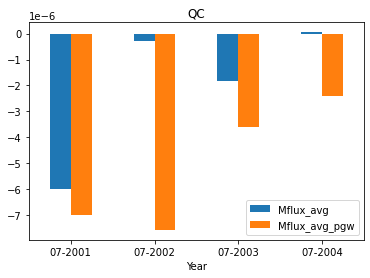

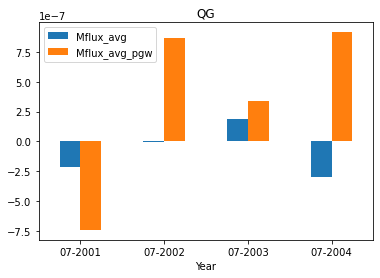

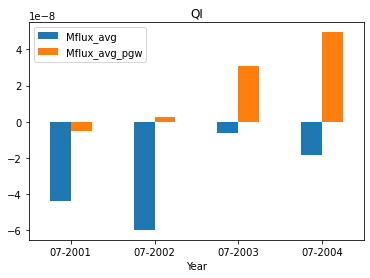

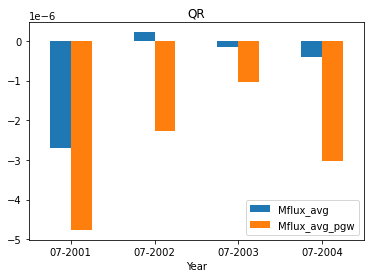

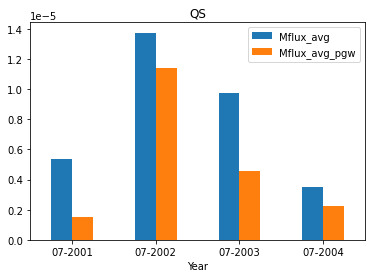

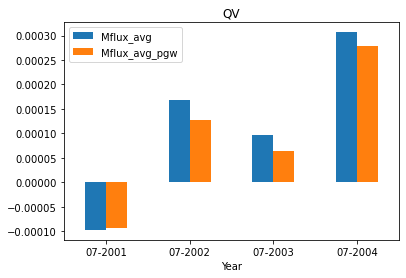

In [132]:
df_new.groupby('Variable')

In [109]:
df_g.indices.keys

<function dict.keys>